<div style="border:solid green 2px; padding: 20px">
<b>Привет!</b>

Меня зовут Евгений Дащенко, и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Сборный Проект - 1

<b>Введение</b>
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<b>Описание данных</b>
Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы проданных копий)
EU_sales — продажи в Европе (миллионы проданных копий)
JP_sales — продажи в Японии (миллионы проданных копий)
Other_sales — продажи в других странах (миллионы проданных копий)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, когда есть вступление в сам проект, каждый сможет быстрее разобраться в концепции / деталях работы. 

</div>

Традиционно, сначала импортируем библиотеки и загрузим исходный файл с указанием полного пути.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [2]:
games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

## Анализ данных

In [3]:
games.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Первым шагом, как мы уже сделали, посмотрим на первые 20 строк таблицы, а затем - на общую информацию.

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Мы видим повторяющиеся строки NaN сразу в трёх столбцах, это [Critic_Score,	User_Score,	Rating] и похожие данные в общей информации (8137, 10014, 9949 заполненных ячеек). В качестве гипотезы предположим, что большинство из них содержат значения NaN в одной строчке (собственно, это видно даже из общего числа объектов). Также неясно, почему User_Score имеет тип object (Rating стало ясно, это не цифра, а буква, согласно описания, что это ESRB. Если проверяющий коллега будет писать игры, также, как я, он убедится, что получить ESRB и PEGI несложно, за исключением пары стран).

In [5]:
games['Year_of_Release'].max()

2016.0

Эту строчку можно не проверять, было интересно, есть ли моя игра тут или нет. Нет, последний год - 2016. Кстати, тут бы int, а не float. Но сначала нужно решить что-то с NaN, иначе возникнет ошибка. Посмотрим, как распределяются пропущенные значения.

Text(0, 0.5, 'Count')

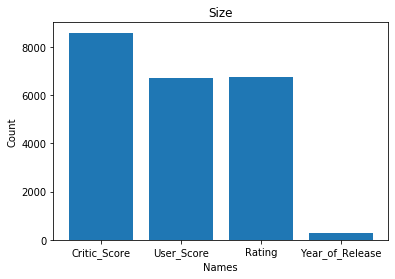

In [6]:
hist = ['Critic_Score', 'User_Score', 'Rating', 'Year_of_Release']
counts = [games['Critic_Score'].isnull().sum(axis = 0), games['User_Score'].isnull().sum(axis = 0), games['Rating'].isnull().sum(axis = 0), games['Year_of_Release'].isnull().sum(axis = 0)]
plt.bar(hist, counts)
plt.title("Size")
plt.xlabel("Names")
plt.ylabel("Count")

Это столбцы с самым большим количеством пробелов. Также, незначительное количество есть в столбцах "Genre" и "Name".

In [7]:
games['Genre'].isnull().sum(axis = 0)

2

In [8]:
games['Name'].isnull().sum(axis = 0)

2

In [9]:
games[games['Genre'].isnull()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Две игры имеют вообще пропущенные значения в имени.
<b>Что будем делать:</b>

'Critic_Score' - самый большой столбец с незаполненными значениями. Я так полагаю, что это те игры, в которых просто отсутствует данные о рецензиях. Но заполнить нулями не очень правильно - а вдруг уже есть игры с нулевым рейтингом?

In [10]:
games.query('Critic_Score == 0')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating


Нет, таких игр нет. Можно заполнить NaN нулями.
Далее, рейтинг. Тут всё проще - он появился позже первых игр, поэтому можно заполнить NaN значением "No".
Year_of_Release - дата выпуска игры, но отсутствующие значения не заменить ни средним, ни медианой.
Что касается User_Score - проверим, есть ли нулевые значения, и если нет, заполним нулями.

In [11]:
games.query('User_Score == 0')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating


И, конечно, нужно заменить заголовки таблицы - убрать заглавные буквы, аналогично приведём к нижнему регистру и данные в столбцах.

In [12]:
#games.columns=['name','platform','year_of_release','genre','na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

In [13]:
old_names = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'] 
new_names = ['name','platform','year_of_release','genre','na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
games.rename(columns=dict(zip(old_names, new_names)), inplace=True)

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

<s>Лучше всего использовать метод `rename`, чтобы изменить названия столбцов. 
    
Он самый безопазсный. Если у нас поменяются столбцы местами, то это сохранит нас от того, что данные сохраняться в нужных столбцах.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Да не вопрос, см. выше.</div>

In [14]:
games.columns = games.columns.str.lower()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Можно было же просто одним этим методом поменять регистр в наших данных 😊    
</div>

In [15]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


## Подготовка данных

Нам необходимо заменить данные NaN на определённые нами. Но есть ещё одна проблема - данные tbd в user_score.

In [16]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [17]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


tbd  - достаточно распространённое явление, где данных для оценки недостаточно. Поэтому заменим на float.

In [18]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float')
games['critic_score'] = games['critic_score'].fillna(0)
games['user_score'] = games['user_score'].fillna(0)
print('Количество пропусков в столбце critic_score - {}'.format(games['critic_score'].isnull().sum()))
print('Количество пропусков в столбце user_score - {}'.format(games['user_score'].isnull().sum()))

Количество пропусков в столбце critic_score - 0
Количество пропусков в столбце user_score - 0


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Кстати мы можем использовать сцепку методов, чтобы оптимизировать наш код.
    
Оставил пример ниже.
    
</div>

In [19]:
games['user_score'].replace('tbd', np.NaN).astype('float')

0        8.0
1        0.0
2        8.3
3        8.0
4        0.0
        ... 
16710    0.0
16711    0.0
16712    0.0
16713    0.0
16714    0.0
Name: user_score, Length: 16715, dtype: float64

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

В том числе метод `fillna` и `astype` можно применять к нескольким столбцам одновременно.
    
Если столбцов более 2–ух, то рекомендую применять цикл `for`.
    
Пример: 
    
`df.astype({ "col1": "float64", "col2": "int64"})`
    
</div>

Две строчки с NaN в названиях удалим.

In [20]:
games = games[games['genre'].notna()]

In [21]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,0.0,0.0,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,0.0,0.0,NaN


Посмотрим на остатки.

In [22]:
games[games['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,0.0,0.0,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,0.0,0.0,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,0.0,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.0,0.0,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.0,0.0,NaN


Думаю, здесь поле rating можно привести к двум предыдущим, т.е. отсутствие информации (0). Но тут нужно заменить не на 0, а на "no"

In [23]:
games['rating'] = games['rating'].fillna('No ESRB')

In [24]:
games[games['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [25]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [26]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,No ESRB
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,No ESRB
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,0.0,0.0,No ESRB
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,0.0,0.0,No ESRB


Итак, мы обработали все значения, кроме года выпуска - заменить их мы не можем.

## Исследовательский анализ

С целью создания диаграмм напишем функцию.

In [27]:
def create_any_bar(groupby_column, func, y='name'):
    plt.style.use('seaborn-pastel')
    df_to_plot = games.groupby(groupby_column)[y]
    if func == 'count':
        df_to_plot_calculated = df_to_plot.count()
        figsize = (15,5)
        plot = df_to_plot_calculated.plot(kind='bar', y=y, figsize=figsize, ec='black')
    elif func == 'sum':
        df_to_plot_calculated = df_to_plot.sum().sort_values()
        figsize = (15,10)
        plot = df_to_plot_calculated.plot(kind='barh', y=y, figsize=figsize, ec='black')

Игры по годам:

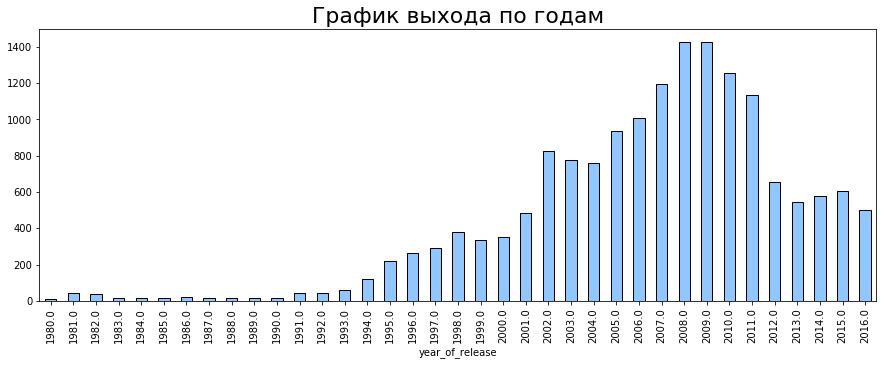

In [28]:
plt.title('График выхода по годам', fontsize=22)
create_any_bar('year_of_release', 'count')

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

<s>Не забывай пожалуйста подписывать каждый график.
    
Это важный момент всего проекта, так быстрее понять о чем идёт речь на графике.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Подписал.</div>

Мы видим динамику распределения: до 2001 г. игр было совсем мало (в рейтинге, конечно, не на самом деле; автор сего опуса писал игры в 1994 и играл в них же). После 2012 их число стало снижаться, вероятно, с тем, что данный рейтинг был сделан для PC (а есть ещё мобильные устройства).

Однако, перейдём к платформам. Тут нужен ещё один столбец "всего".

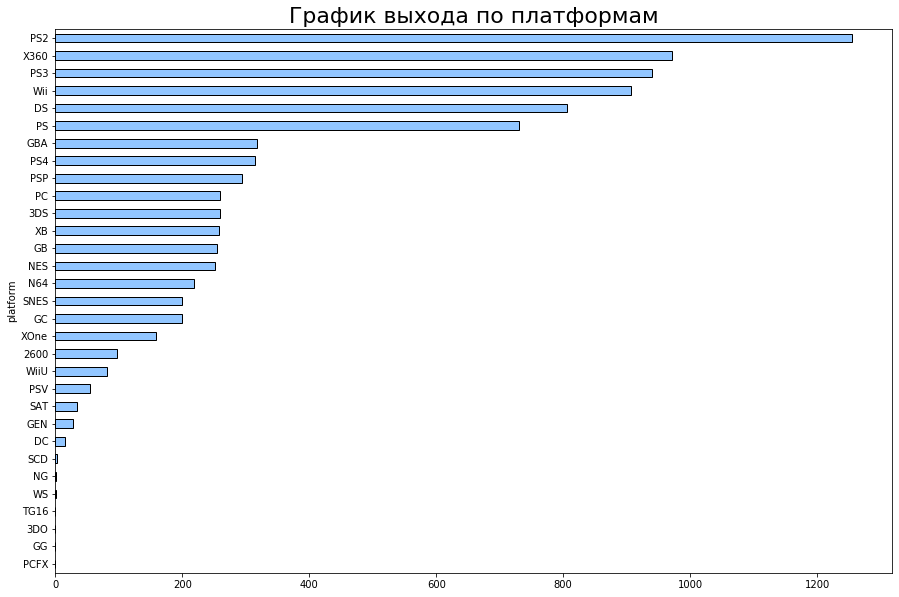

In [29]:
games['sales_total'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
plt.title('График выхода по платформам', fontsize=22)
create_any_bar('platform', 'sum', 'sales_total')

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Кстати для того чтобы подписать график мы можем использовать метод `plt.title()` и в конце кода применить `plt.show()`
</div>

PS2, X360, PS3 - кто все эти игроки? Почему забыли старый добрый PC? Он лишь на 10 месте. Ладно, истинная безвестность всё равно у каких-то японских игроделов.

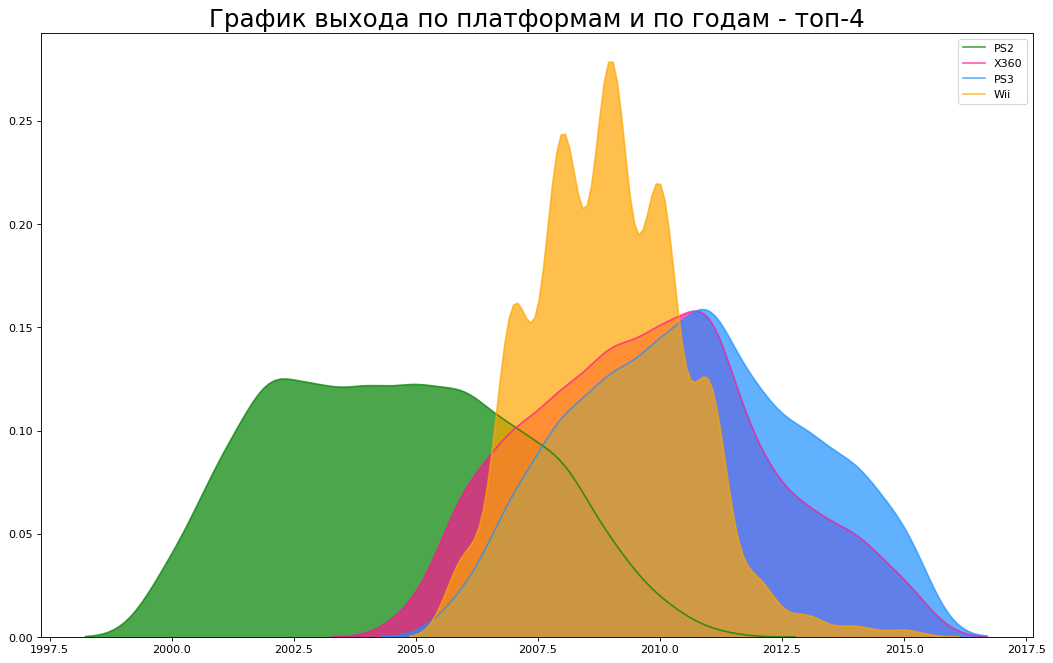

In [30]:
def games_plt(year1, year2, platform1, platform2, platform3, platform4):
    plt.figure(figsize=(16,10), dpi=80)
    sns.kdeplot(games.loc[games['platform'] == platform1, "year_of_release"], shade=True, color="g", label="PS2", alpha=.7, clip=(year1, year2))
    sns.kdeplot(games.loc[games['platform'] == platform2, "year_of_release"], shade=True, color="deeppink", label="X360", alpha=.7, clip=(year1, year2))
    sns.kdeplot(games.loc[games['platform'] == platform3, "year_of_release"], shade=True, color="dodgerblue", label="PS3", alpha=.7, clip=(year1, year2))
    sns.kdeplot(games.loc[games['platform'] == platform4, "year_of_release"], shade=True, color="orange", label="Wii", alpha=.7, clip=(year1, year2))

    plt.title('График выхода по платформам и по годам - топ-4', fontsize=22)
    plt.legend()
    plt.show()
games_plt(1990, 2016, "PS2", "X360", "PS3", "Wii")

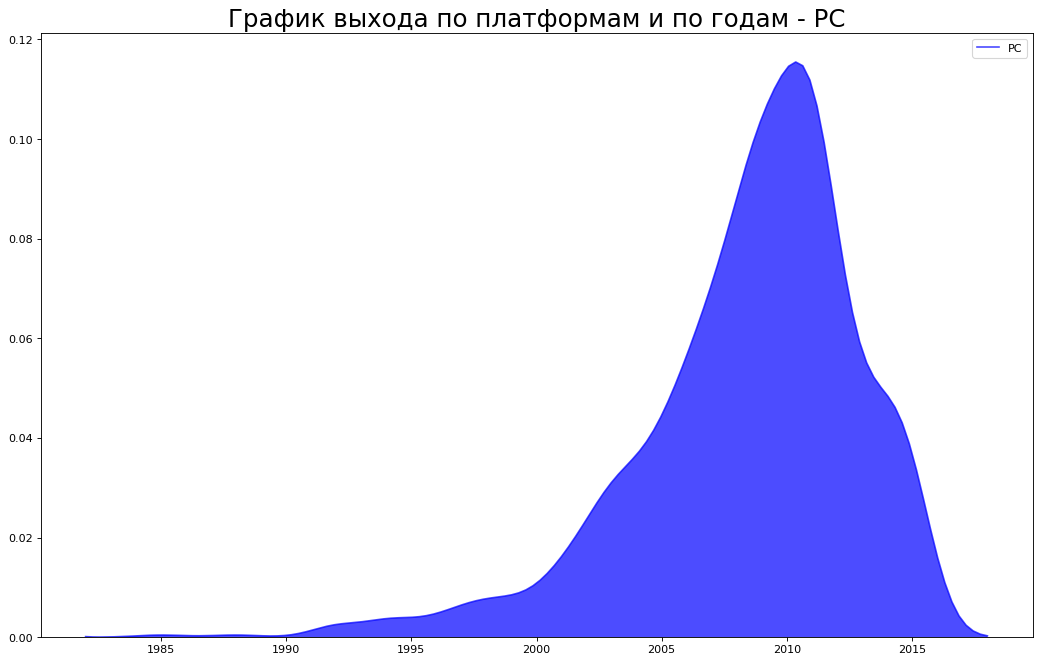

In [31]:
plt.figure(figsize=(16,10), dpi=80)
sns.kdeplot(games.loc[games['platform'] == "PC", "year_of_release"], shade=True, color="blue", label="PC", alpha=.7, clip=(1980, 2016))

# Decoration
plt.title('График выхода по платформам и по годам - PC', fontsize=22)
plt.legend()
plt.show()

Определим срок жизни платформы. PS2 и все остальные - примерно 10 лет (с округлением), Wii поменьше, около 8. По-видимому, это определённый цикл зарождения и умирания. PC, например, выбивается из этого срока и является самым большим долгожителем, я его вынес отдельно.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>
    
В том числе мы могли посчитать срок жизни платформы – вычесть из максимальной даты минимальную по каждой платформе и затем усреднить получившиеся значения.
    
</div>

Ещё раз окинем взглядом продажи.

In [32]:
games.groupby('platform')['sales_total'].sum().to_frame('sales_total').sort_values(by='sales_total', ascending=False).head(10)

,sales_total
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Также, нужно определить динамику продаж в наше время. Конечная дата, которая здесь присутствует - 2016 год. Началом я бы выбрал 2005, это также год выпуска многих культовых игр, таких, как продолжение "Far Cry" и "Sniper Elite".

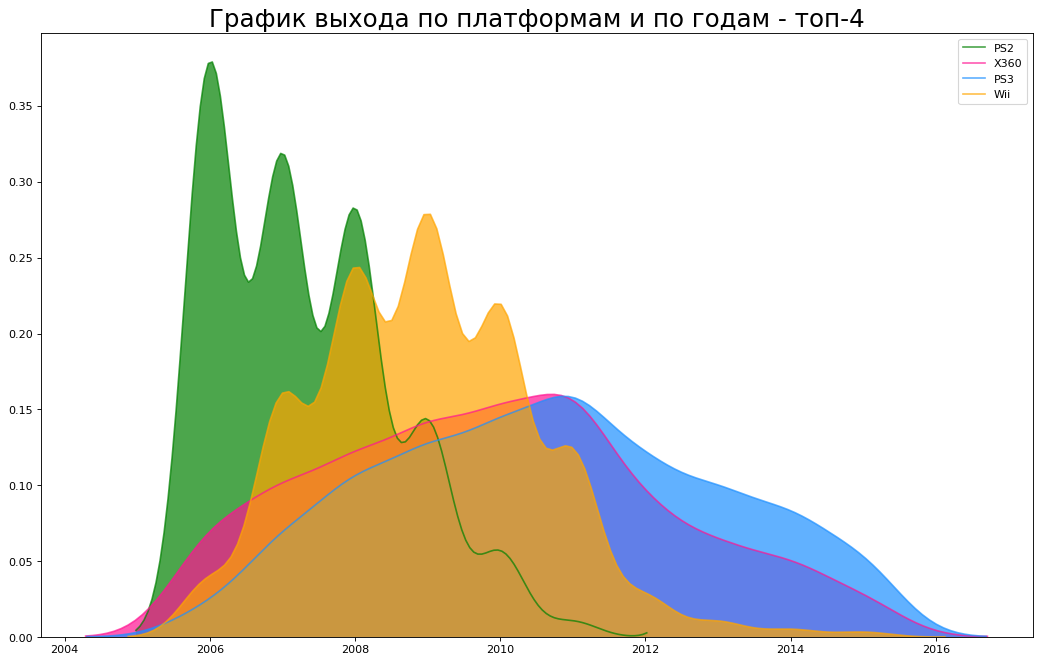

In [33]:
games_plt(2005, 2016, "PS2", "X360", "PS3", "Wii")

Красивый график для топа продаж, но может, есть и молодые платформы, которые лидируют?

In [34]:
games.query('year_of_release >= 2005').groupby('platform')['sales_total'].sum().to_frame('sales_total').sort_values(by='sales_total', ascending=False).head(10)

,sales_total
platform,
X360,961.24
PS3,931.34
Wii,891.18
DS,785.49
PS2,426.46
PS4,314.14
PSP,282.47
3DS,257.81
PC,167.79


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Хорошо, что проверили наш топ после выбора актуального периода.
    
</div>

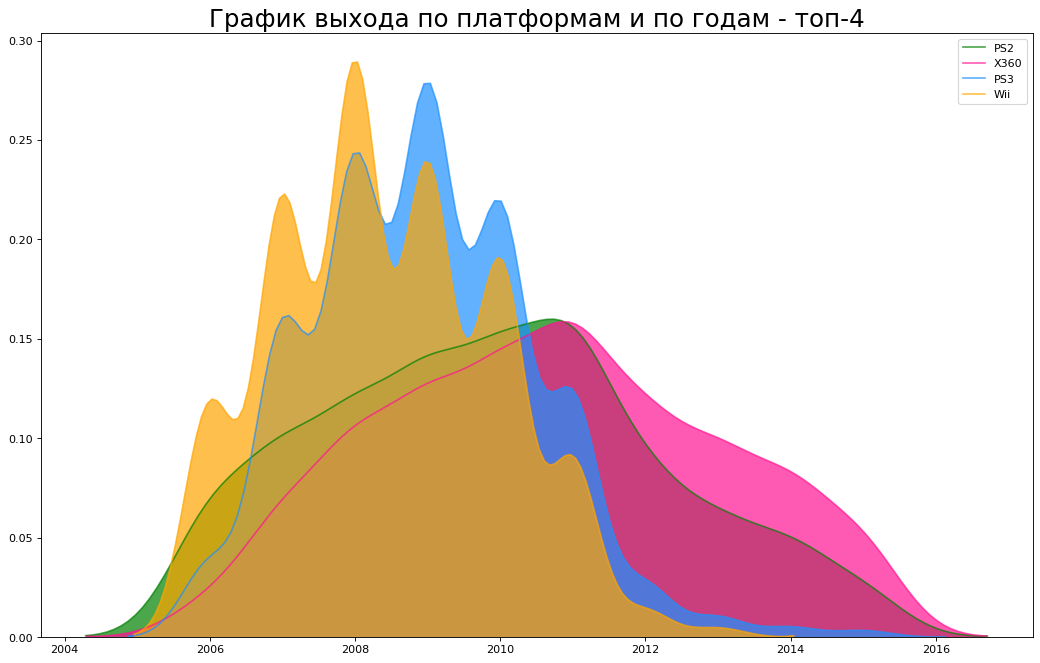

In [35]:
games_plt(2005, 2016, "X360", "PS3", "Wii", "DS")

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Кстати если вдруг тебе понравилась тема визуализации, рекомендую посмотреть библиотеку `plotly` 
    
</div>

In [36]:
games.query('year_of_release == 2016').groupby('platform')['sales_total'].sum().to_frame('sales_total').sort_values(by='sales_total', ascending=False).head(10)

,sales_total
platform,
PS4,69.25
XOne,26.15
3DS,15.14
PC,5.25
WiiU,4.60
PSV,4.25
PS3,3.60
X360,1.52
Wii,0.18


Видно, что динамика на рынке быстро меняется даже за такой промежуток. А в топе на 2016 год появляются совершенно другие и новые платформы.

Построим boxplot по глобальным продажам игр.

In [37]:
def create_any_sales_boxplot(title=None, query_condition = None, ylims=None):
    %matplotlib inline
    if query_condition == None:
        ax = games.boxplot(column='sales_total', fontsize=25, figsize=(25,10),
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5), 
                                         notch=True)
    else:
        df_query = games.query(query_condition)
        by_column = query_condition.split()[0]
        ax = df_query.boxplot(column='sales_total', by=by_column, fontsize=25, figsize=(25,10),
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True)
        ax.set_xlabel('')
        ax.set_title('')
    if ylims != None:
        ax.set_ylim(ylims)
    if title != None:
        plt.suptitle(title, y=0.94, fontsize=25, fontweight='bold')

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Очень круто, что создаем свои собственные функции 👍
    
В том числе хорошим тоном считается создавать описание для наших функций, ведь с помощью него гораздо быстрее понять что же делает функция.
    
</div>

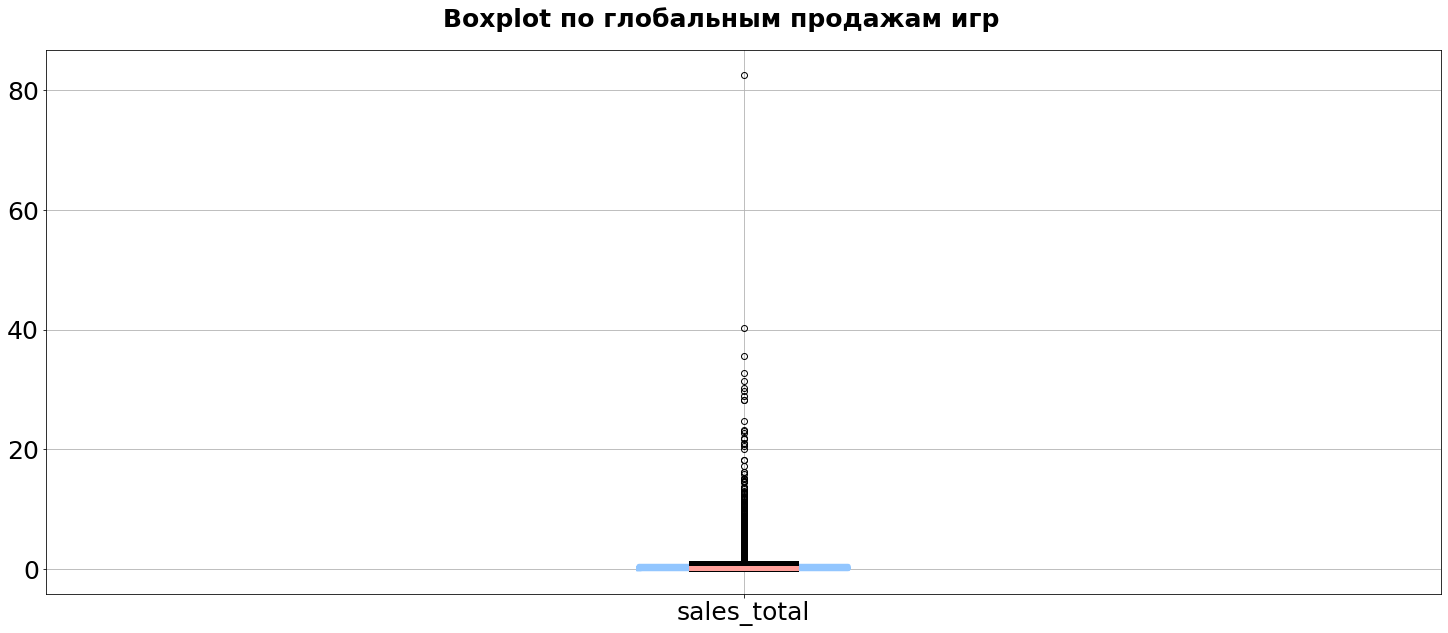

In [38]:
create_any_sales_boxplot('Boxplot по глобальным продажам игр')

Уточним:

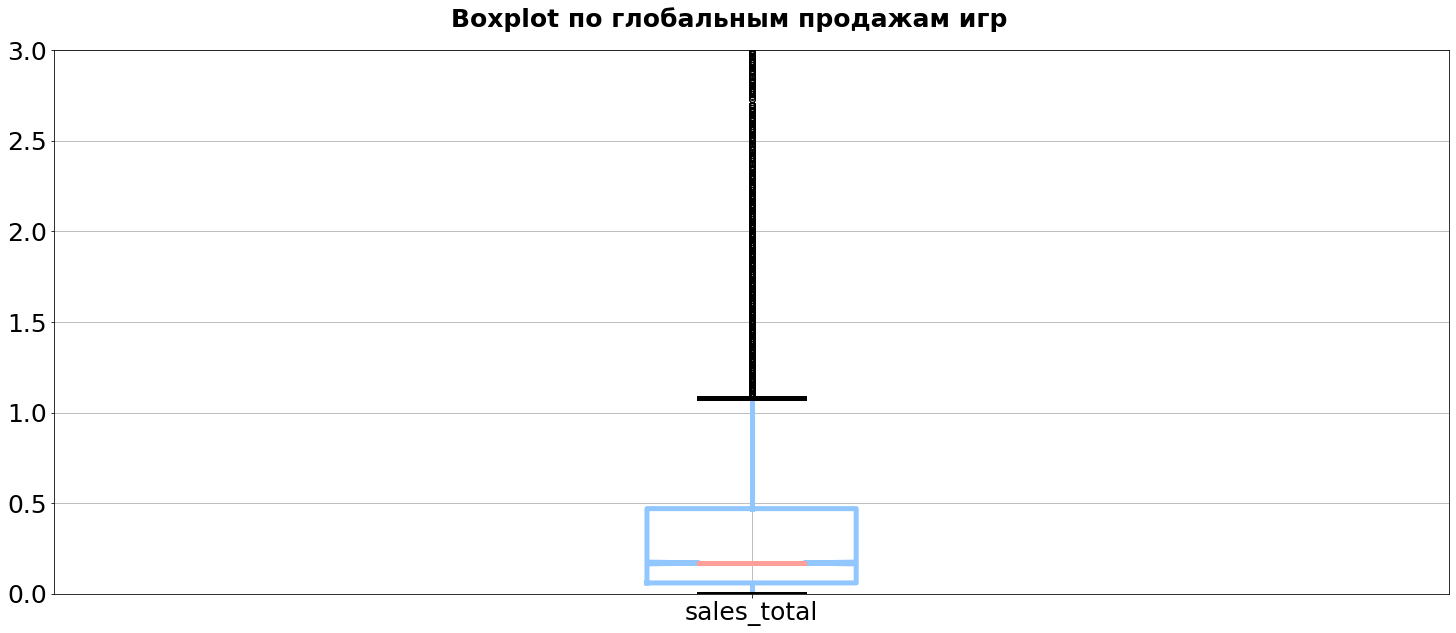

In [39]:
create_any_sales_boxplot('Boxplot по глобальным продажам игр', ylims=[0,3])

Мы видим, что продажи игр составляют до 1,2 млн. (долларов).

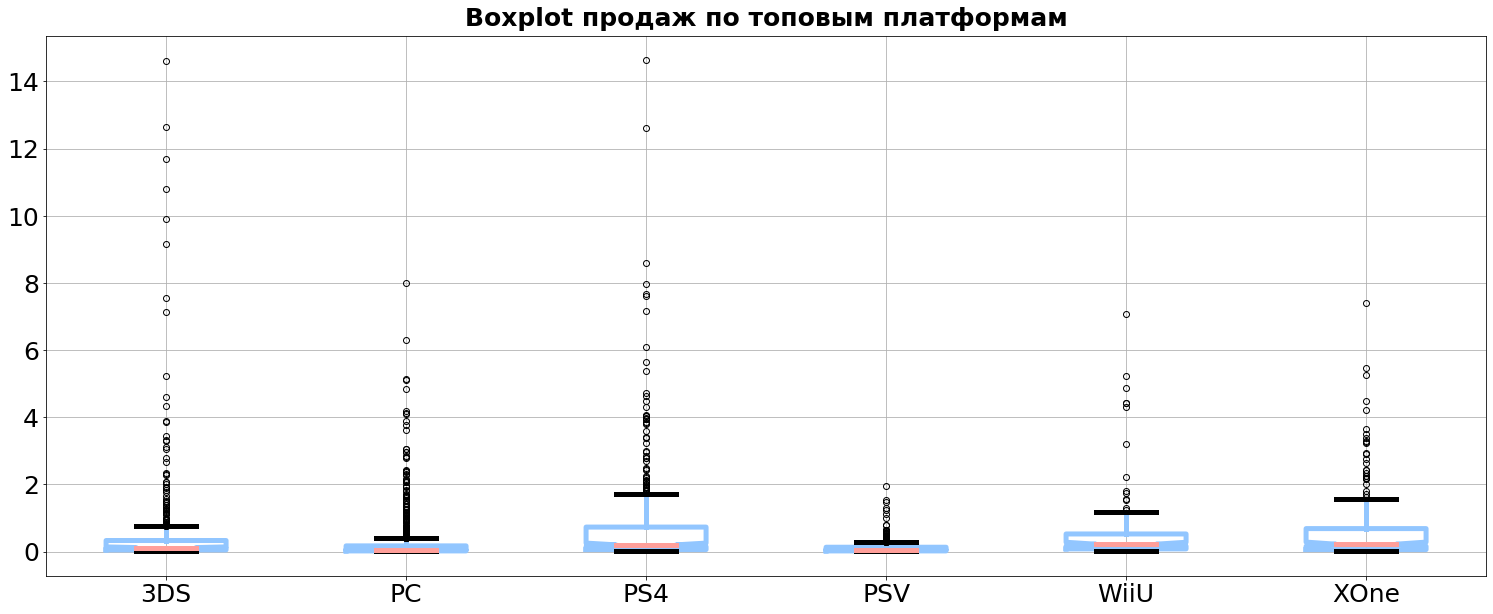

In [40]:
top_platforms = ['PS4', 'XOne', 'PC', 'WiiU', '3DS', 'PSV']
create_any_sales_boxplot('Boxplot продаж по топовым платформам', query_condition="platform in @top_platforms")

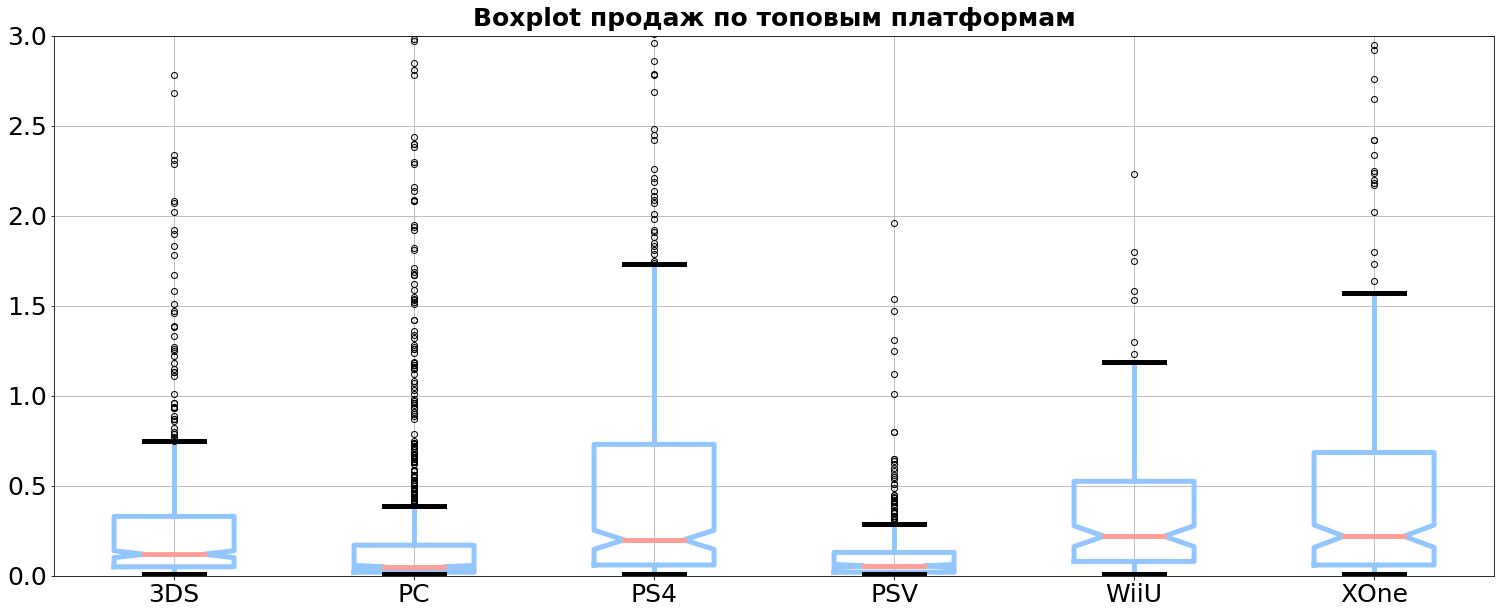

In [41]:
create_any_sales_boxplot('Boxplot продаж по топовым платформам', query_condition="platform in @top_platforms", ylims=[0,3])

Медиана по топовым платформам варьируется от 0,2 до 0,3 млн. долларов прибыли за игру.
Верхняя граница предела, за которыми уже определяются аномалии, у двух платформ - PS4 и XOne - на уровне 1,7 млн. долларов.
У остальных - от 0,3 до 1,2 миллионов долларов.

Как же влияют отзывы? Из графика 2005-2016 выделяется X360. Она занимает первое место.

In [42]:
games_360 = games[(games['platform'] == 'X360') & (games['critic_score'] > 0)].copy()

Строим диаграмму рассеяния зависимости общей суммы продаж игры от отзывов критиков:

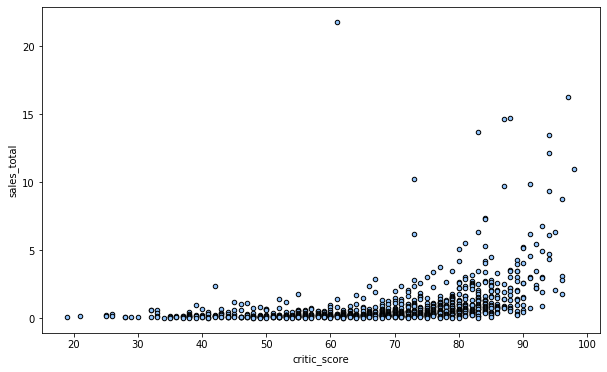

In [43]:
#from matplotlib.axes._axes import _log as matplotlib_axes_logger
#matplotlib_axes_logger.setLevel('ERROR')

games_360 = games[(games['platform'] == 'X360') & (games['critic_score'] > 0)].copy()
games_360.plot(kind='scatter', x='critic_score', y='sales_total', ec='black', figsize=(10,6))

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

<s>Лучше всего импортировать все необходимые библиотеки в самом начале проекта. 
    
Это общепринятый формат в программировании, ведь так проще понять какие пакеты будут использованы в нашей работе.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Точно, поправил. Вообще, это видно, когда смотришь на сделанную работу, а не когда в процессе обнаружена потребность.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

Так и есть 😊, но я всегда в своей практике причесываю эти моменты в самом конце или сразу.    
</div>

С увеличением среднего рейтинга критиков увеличивается и средний уровень выручки с продажи игр, что выглядит логично. Посмотрим на отзывы пользователей.

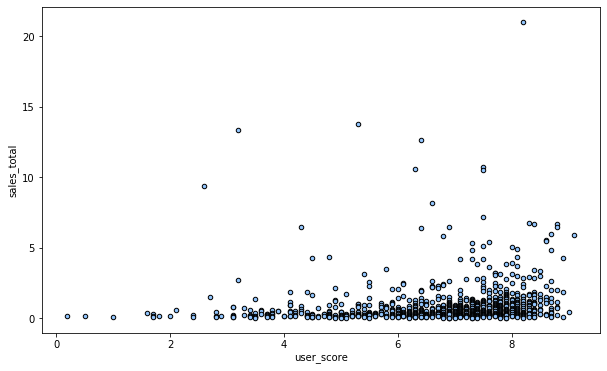

In [44]:
games_360 = games[(games['platform'] == 'PS3') & (games['user_score'] > 0)].copy()
games_360.plot(kind='scatter', x='user_score', y='sales_total', ec='black', figsize=(10,6))

Картина идентичная, но выбросов больше.

Посмотрим на матрицу корреляции.

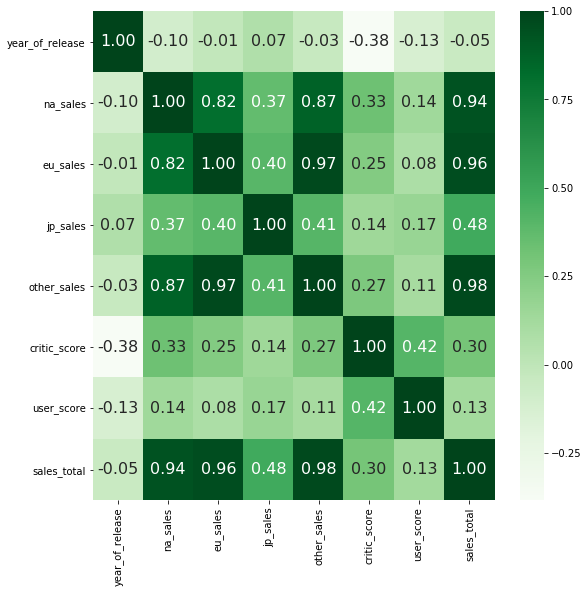

In [45]:
plt.figure(figsize=(9,9))
sns.heatmap(games_360.corr(), annot=True, cmap="Greens", fmt='.2f', annot_kws={'size':16})

Нужно выделить другие данные. Данные о продажи, рейтинг критиков и юзверей.

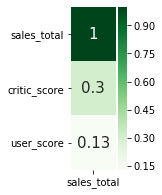

In [46]:
games_360_filtered = games_360[['sales_total' ,'critic_score', 'user_score']]
plt.figure(figsize=(1,3))
sns.heatmap(games_360_filtered.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), cmap="Greens", 
            annot=True, annot_kws={'size':15})

Сильнее всего на конечную стоимость влияет оценка критиков. Менее - пользователей. Не зря я рассылал свою игру критикам. Ну что же, посмотрим на данные по корреляции основных платформ, которых мы смотрели в самом начале.

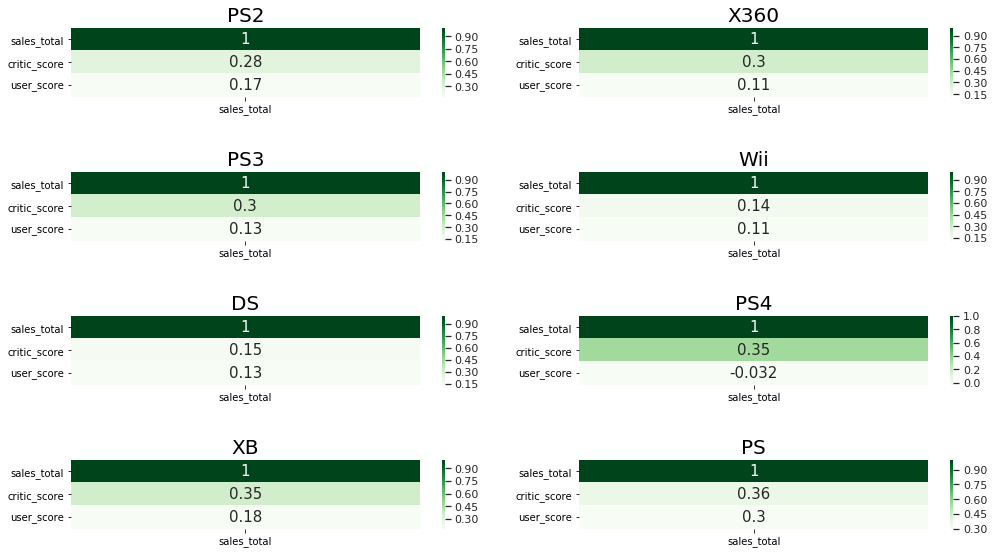

In [47]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS4', 'XB', 'PS']

rows = len(top_platforms) // 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,8.5))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_platform = top_platforms[count]
        df_prep = games[(games['platform'] == curr_platform) & (games['user_score'] > 0)].copy()
        
        df_filtered = df_prep[['sales_total' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), 
                         cmap="Greens", annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(curr_platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

Данные примерно совпадают, за исключением Wii. Что не так с Nintendo (она же DS)? Японцы, возможно, это сказалось на рейтинге, ведь в Японии совсем другая игровая ситуация, играют там с детства.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>
    
Хорошие и логичные комментарии. 
    
---

Здорово что использовали `heatmap` из библиотеки `seaborn`.
    
</div>

Распределим игры по жанрам.

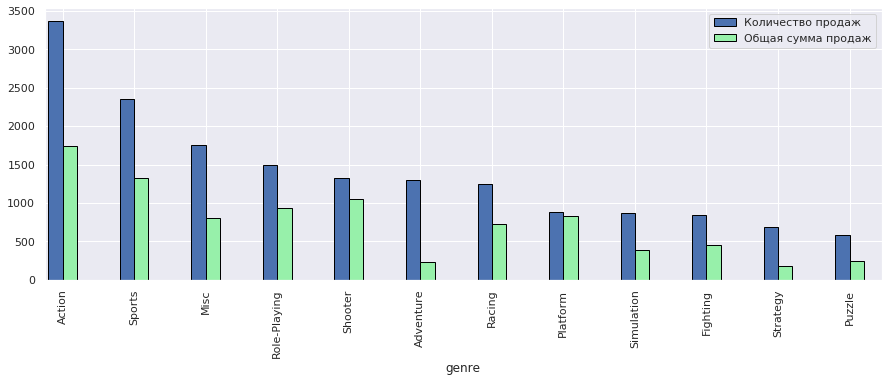

In [48]:
ax = plt.gca()

pivot = games.groupby('genre').agg({'name': 'count', 'sales_total': 'sum'}).sort_values(by='name', ascending=False)

plot1 = pivot['name']
plot1.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, position=1)

plot2 = pivot['sales_total']
plot2.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='#97F0AA', position=0)

ax.legend(['Количество продаж', 'Общая сумма продаж'])

Action-игр больше всего. Puzzle - менее. Спортивных игр больше, чем шутеров, но выручка одинаковая. Интересно, что платформеры собирают наряду с РПГ и симуляторами, хотя я как раз создавал платформер в одно лицо. А сколько человек в Rockstar, например?

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

А если мы посмотрим на средние значения продаж, какие выводы мы сможем сделать ? 
    
Почему на средние значения ? 
    
Т.к. эта метрика более устойчива к выбросам, чем просто суммы и количественные показатели.
    
</div>

## Портрет пользователя регионов

Теперь про портреты пользователей. Определим для пользователя каждого региона (NA, EU, JP):

- самые популярные платформы (топ-5), опишем различия в долях продаж;
- самые популярные жанры (топ-5), поясним разницу;
- определим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

Создадим функцию для прорисовки графиков top_in_regions_plot:

In [49]:
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = games.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    color_dict = {'na_sales': 'blue', 'eu_sales': 'gray', 'jp_sales': 'forestgreen'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

Определим самые популярные платформ в заданных регионах:

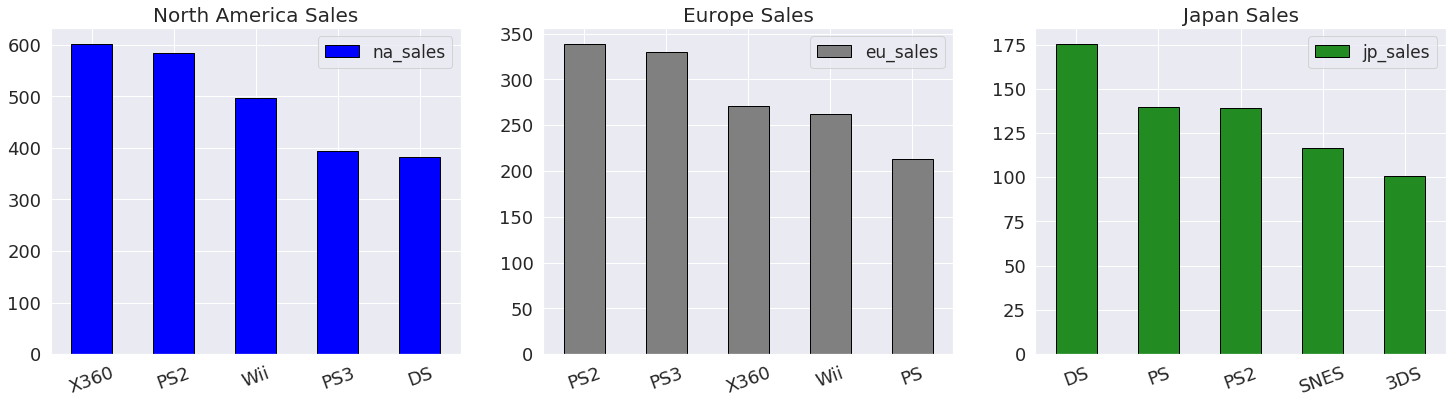

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>

<s>Кажется что-то пошло не так ☹️

Посмотри пожалуйста в чем дело.

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Я поправлял последние штрихи. Видимо, что-то поправилось не так, хотя я всегда проверяю проект перед отправкой. Но на моём ноутбуке тоже ошибка. Возможно, я иногда нажимаю "1" в ячейке вместо переключения, а она правится на заголовок. В общем, исправил.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

Здорово, что достаточно оперативно разобрались в этой ошибке.
    
</div>

В Северной Америке имеют(имели) бешеную популярность приставки прошлого поколения X360 и PS2. Немного отстает Wii. Топ-4 и топ-5 - PS3 и DS соответственно.
В Европе популярны PS2 и PS2. За ними X360, Wii и PS.
В Японии, как обычно, всё наоборот. Лидер - DS. За ними американские PS и PS2. 

Теперь о жанрах.

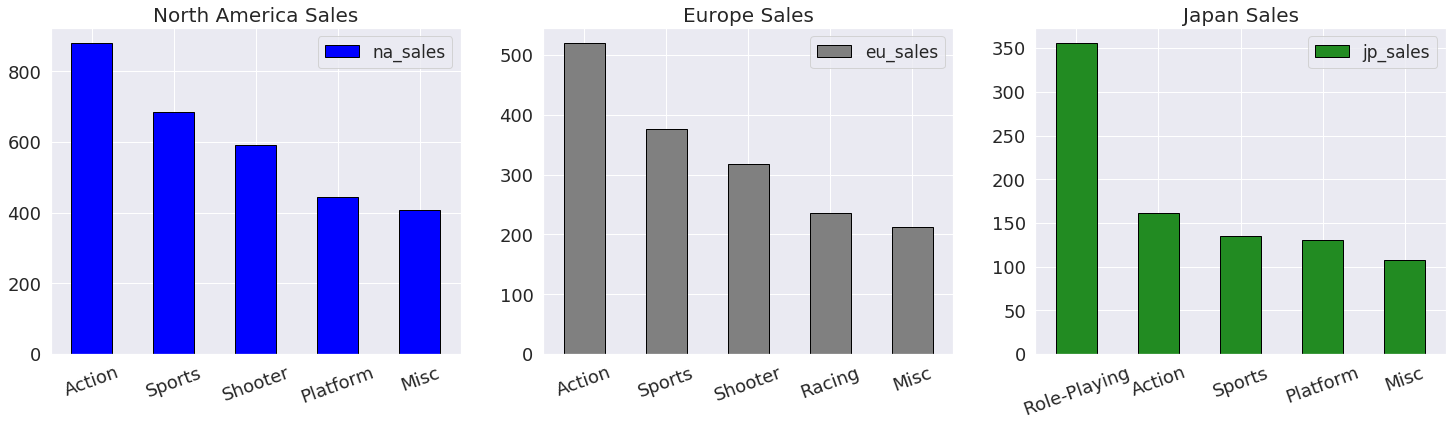

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)

В Европе и Америки жанры примерно схожи. И совсем по-другому в Японии, там очень любят RPG.

И, наконец, узнаем, как влияет рейтинг.

In [52]:
ESRB_dict = {'E': 'Для всех', 'M': '> 17 лет', 'T': '13-19 лет', 'E10+': '>10 лет', 'K-A': 'Для всех (устар.)', 'No ESRB': 'Нет рейтинга'}
games['esrb_description'] = games[games['rating'].notnull()]['rating'].map(ESRB_dict)
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total,esrb_description
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,Для всех
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,No ESRB,40.24,Нет рейтинга
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,Для всех
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,Для всех
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,No ESRB,31.38,Нет рейтинга
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,0.0,No ESRB,0.01,Нет рейтинга
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.0,0.0,No ESRB,0.01,Нет рейтинга
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,No ESRB,0.01,Нет рейтинга
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.0,0.0,No ESRB,0.01,Нет рейтинга


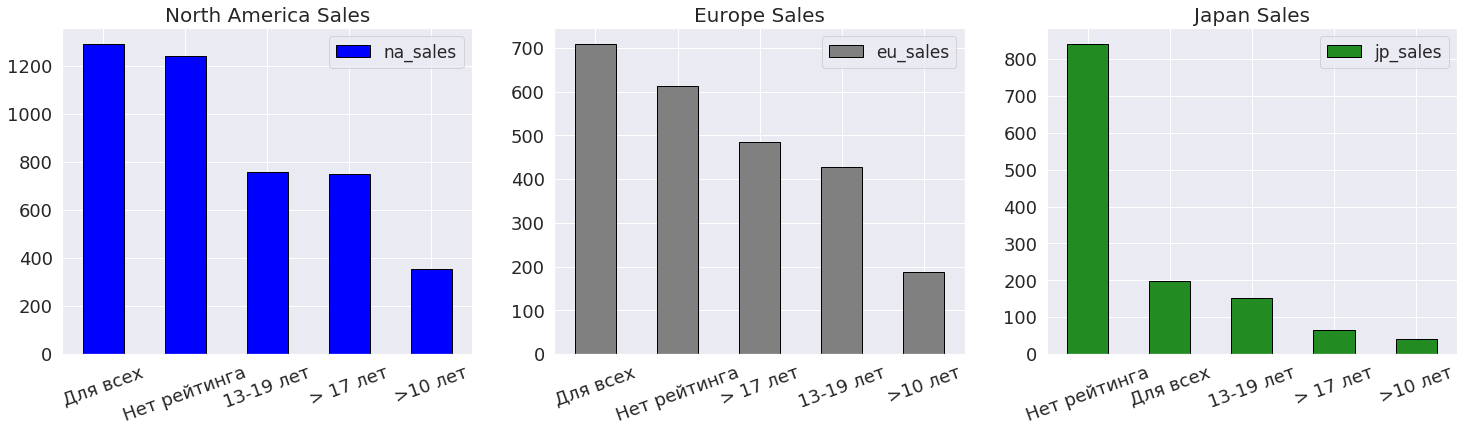

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('esrb_description', 'na_sales', 0)
top_in_regions_plot('esrb_description', 'eu_sales', 1)
top_in_regions_plot('esrb_description', 'jp_sales', 2)

Похоже, что примерно всё одинаково, но в Европе любят игры погорячее (>17 лет).

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Достаточно детально проанализировали наши данные и изучили портреты пользователей.
    

    
Давай теперь проверим наши гипотезы.
    
</div>

## Проверка гипотез

Сформулируем нулевую и альтернативную гипотезы:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action и Sports разные.
Для проверки обеих гипотез будем использовать t-критерий Стьюдента, т.к. в обоих случаях выборки независимы между собой.
Определим пороговое значение alpha = 0.05, как обычно, это всё же не медицина.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Гипотезы сформулированы верно.
    
    
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

    
    
**Best practies:**
    
Перед проверкой гипотезы рекомендую проверить дисперсии выборок, чтобы корректно определить атрибут `equal_val` в Т–тесте.
    
В том числе стоит визуализировать распределение каждой выборки, чтобы определить нормальное ли у них распределение или нет.
    
Так мы покажем логичность и последовательность наших действий.
    
</div>

In [54]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total,esrb_description
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,Для всех
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,No ESRB,40.24,Нет рейтинга
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,Для всех
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,Для всех
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,No ESRB,31.38,Нет рейтинга
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,0.0,0.0,No ESRB,30.26,Нет рейтинга
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,Для всех
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,Для всех
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32,Для всех
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,0.0,0.0,No ESRB,28.31,Нет рейтинга


In [55]:
xbox_one_ratings = games[(games['platform'] == 'XOne') & (games['user_score'] > 0)]['user_score']
pc_ratings = games[(games['platform'] == 'PC') & (games['user_score'] > 0)]['user_score']
stat, p = ttest_ind(xbox_one_ratings, pc_ratings)

print('t = {}\np-value = {:.10e}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')

t = -4.368333815003015
p-value = 1.3896435534e-05

Пороговое значение alpha = 0.05


Верно следующее утверждение: <b>средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.</b>

In [56]:
print('Средняя оценка пользователей игр для платформы Xbox One  - {:.2f}'.format(xbox_one_ratings.mean()))
print('Средняя оценка пользователей игр для платформы PC - {:.2f}'.format(pc_ratings.mean()))

Средняя оценка пользователей игр для платформы Xbox One  - 6.52
Средняя оценка пользователей игр для платформы PC - 7.06


<b>Игры на PС получают оценку выше.</b>

Проверим ещё одну гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные. Соответственно:
Н0 (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.
Н1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Гипотезы сформулированы верно.
    
    
    
</div>

In [ ]:
action_ratings = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
pc_ratings = games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']
stat, p = ttest_ind(action_ratings, pc_ratings)

print('t = {}\np-value = {:.4f}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')

Мы не можем отвергнуть нулевую гипотезу.
Таким образом, остается верным утверждение, что <b>средние пользовательские рейтинги жанров Action и Sports одинаковые</b>.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Обрати внимание, что наши действия также повторяются с точки зрения расчетов статистических тестов, это говорит о том, что мы можем также создать здесь функцию 😊
    
</div>

## Общий вывод

Итак, вывод напрашивается крайне интересный. Несмотря на то, что я сам в этой индустрии, хотя это и является моим хобби, самое сильное влияние на итоговую выручку оказывают оценки критиков. Оценки пользователей большим влиянием на выручку похвастаться не могут. Это крайне важное замечание.

Графики показывают, что PC и приставочные игры на конец 2016 года медленно умирают. Предпочтение отдают мобильным платформам. От себя добавлю, что уже давно и неинтересно создавать сложные или атмосферные игры, они делаются небольшими командами и почти не получают прибыли. В топе - создание довольно примитивных мобильных игр с устоявшимся геймплеем с огромными суммами на рекламу - без этого в индустрии делать нечего. Но это я уже от себя.

Итак, рынок немобильных игр умирает. Вкладываться надо в мобильные платформы (утверждение, конечно, абсолютно неверное - ни в коем случае туда вкладываться нельзя, но в современном мире, где ценятся только деньги, это самое верное решение). При наличии бюджета можно пока вкладываться и в AAA-игры, а также в шутеры и спортивные симуляторы.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
       
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
    
    
Поздравляю с успешным завершением проекта 😊👍
    
И желаю успехов в новых работах 😊
    
**[общий комментарий]** Ячейки **markdown** в том числе мы можем использовать как дополнительный способ стилизации нашего проекта. Оставил ниже ссылку, с примерами стилизации.

https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet     
</div>